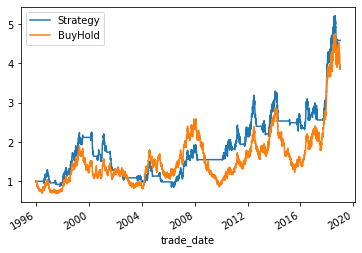

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
data = pd.read_csv('SNPS.csv', index_col='trade_date', parse_dates=['trade_date'])
data['SMA50'] = data['open'].rolling(50).mean()
data['SMA100'] = data['open'].rolling(100).mean()
data['position'] = np.where(data['SMA50'] > data['SMA100'],1,0)
data['position'] = data['position'].shift()
data['StrategyPcnt'] = data['open'].pct_change(1) * data['position']
data['Strategy'] = (data['StrategyPcnt'] + 1).cumprod()
data['BuyHold'] = (data['open'].pct_change(1) + 1).cumprod()
data[['Strategy','BuyHold']].plot()